# Working with immune repertoire sequence data using `R`

We will be using `tidyverse` and `Bioconductor` to work with pre-processed immune repertoire sequence data in `R`.
You have already learned about both of these collections of packages, and today's class will give you the opportunity to practice using them in a new biological context.

Goals for today's class:
1. Familiarize with the format of immune repertoire sequence data
2. Work through an example analysis, and practice on your own

## Load packages

In [1]:
library(Biostrings)
library(tidyverse)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading required package: GenomeInfoDb


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:



## Loading the data

In [2]:
indiv1 <- read.csv('https://drive.google.com/uc?id=1b1oXlhg99_YCPK_HzFL2ohYPDxvTbQOo', sep = '\t', header = TRUE)
indiv2 <- read.csv('https://drive.google.com/uc?id=10qMY16H9wD_wuC4ISAJRTRx_bOeclg5D', sep = '\t', header = TRUE)

Let's take a look at the data. 
Recall that each annotated sequence takes the form:

5'-[__Vgene__]-(_possible Vgene deletion_)-[__N1insertion__]-(_possible Dgene deletion_)-[__D gene__]-(_possible Dgene deletion_)-[__N2insertion__]-(_possible Jgene deletion_)-[__J gene with possible deletion__]-3'

Using the column names given by the file, we can interpret this as:

5'-[__`v_gene`__]-(_`v_trim`_)-[__`vd_insert`__]-(_`d0_trim`_)-[__`d_gene`__]-(_`d1_trim`_)-[__`dj_insert`__]-(_`j_trim`_)-[__`j_gene`__]-3'

In [3]:
head(indiv2)

,seq_index,scenario_rank,scenario_proba_cond_seq,cdr3_nucseq,cdr3,v_gene,d_gene,j_gene,v_trim,d0_trim,⋯,j_trim,vd_insert,dj_insert,vd_insert_nucs,dj_insert_nucs,productive,v_pnuc,d0_pnuc,d1_pnuc,j_pnuc
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<int>
1,0,1,0.0650989,TGTGCCAGTAGTATTTTACAATGAGCAGTTCTTC,,TRBV19*01,TRBD1*01,TRBJ2-1*01,3,0,⋯,4,0,2,,TT,FALSE,0,0,0,0
2,1,8,0.0365358,TGTGCCAGCAGCTTGAATCACGAGCAGTACTTC,CASSLNHEQYF,TRBV5-6*01,TRBD2*02,TRBJ2-7*01,1,3,⋯,5,4,0,AATC,,TRUE,0,0,0,0
3,2,4,0.0285733,TGCGCCAGCAGCTTGGCAGAGACCCAGTACTTC,CASSLAETQYF,TRBV5-1*01,TRBD1*01,TRBJ2-5*01,2,9,⋯,4,0,0,,,TRUE,0,0,0,0
4,3,1,0.0189726,TGTGCCAGCAGGTGGCAATCAGCCCCAGCATTTT,,TRBV7-9*01,TRBD2*02,TRBJ1-5*01,7,10,⋯,2,0,2,,GT,FALSE,0,0,0,0
5,4,10,0.0190391,TGTGCCAGCAGCCTGAGCTTTCTTT,,TRBV3-2*01,TRBD2*02,TRBJ1-1*01,4,14,⋯,11,1,1,T,A,FALSE,0,0,0,0
6,5,7,0.0230747,TGTGCCAGCAGGTGTATTTT,,TRBV12-3*01,TRBD2*02,TRBJ1-3*01,6,1,⋯,16,2,0,GT,,FALSE,0,0,0,0


## Some example analyses using `tidyverse` and `Bioconductor`

Find which V-gene occurs most frequently for individual 2

In [4]:
Vcounts2 <- indiv2 %>%
                group_by(v_gene) %>%
                summarise(total_count = n()) %>%
                arrange(desc(total_count))

head(Vcounts2)

v_gene,total_count
<chr>,<int>
TRBV20-1*01,7510
TRBV30*01,3846
TRBV19*01,3358
TRBV6-5*01,3271
TRBV9*01,2999
TRBV18*01,2879


Plot the distribution of trimming lengths for that gene

In [6]:
# isolate most frequently used V-gene
most_frequent_V <- Vcounts2 %>%
                    filter(total_count == max(Vcounts2$total_count))

head(most_frequent_V)

v_gene,total_count
<chr>,<int>
TRBV20-1*01,7510


In [8]:
# filter original data set by most frequently used V-gene
most_frequent_V_data <- indiv2 %>%
                            filter(v_gene == most_frequent_V$v_gene)
head(most_frequent_V_data)

,seq_index,scenario_rank,scenario_proba_cond_seq,cdr3_nucseq,cdr3,v_gene,d_gene,j_gene,v_trim,d0_trim,⋯,j_trim,vd_insert,dj_insert,vd_insert_nucs,dj_insert_nucs,productive,v_pnuc,d0_pnuc,d1_pnuc,j_pnuc
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<int>
1,6,6,0.0393035,TGCAGTGCTAGAGATATCAGCCCCAGCATTTT,,TRBV20-1*01,TRBD2*02,TRBJ1-5*01,0,12,⋯,6,0,0,,,FALSE,1,0,0,0
2,37,3,0.0861763,TGCAGTGCTTTACCGGGACAGTCGCCTACGAGCAGTACTTC,,TRBV20-1*01,TRBD1*01,TRBJ2-7*01,6,0,⋯,2,4,3,TTTA,GCT,FALSE,0,2,0,0
3,62,3,0.0783210,TGCAGTGCTATCGGGACTAGCGGGACGAGCAATGAGCAGTTCTTC,CSAIGTSGTSNEQFF,TRBV20-1*01,TRBD2*01,TRBJ2-1*01,4,0,⋯,6,2,5,TC,GAGCA,TRUE,0,0,0,0
4,88,3,0.0782809,TGCAGTGCTAGCCGGGACTACGGTTGGGACTATGGCTACACCTTC,CSASRDYGWDYGYTF,TRBV20-1*01,TRBD2*02,TRBJ1-2*01,3,0,⋯,3,0,10,,GGGTTGGCAT,TRUE,0,2,0,0
5,107,7,0.0231497,TGCAGTGCTAGAGATGGGCCGGGAGAAAACATTCAGTACTTC,CSARDGPGENIQYF,TRBV20-1*01,TRBD2*01,TRBJ2-4*01,0,8,⋯,5,4,2,GGGC,GA,TRUE,1,0,0,0
6,184,2,0.1917440,TGCAGTGCTAGAGATCTCTGGTTTACTAGCGGGGAGAACAATGAGCAGTTCTTC,CSARDLWFTSGENNEQFF,TRBV20-1*01,TRBD2*01,TRBJ2-1*01,0,3,⋯,5,8,3,TCTGGTTT,AGA,TRUE,2,0,0,0


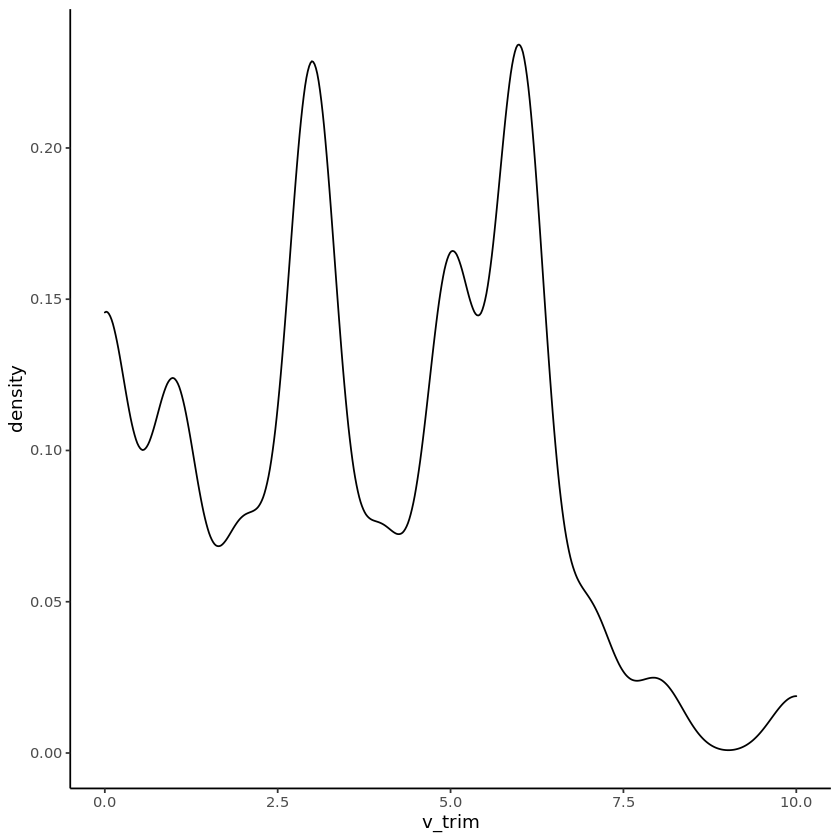

In [9]:
# plot trimming distribution
most_frequent_V_data %>%
    ggplot(aes(x = v_trim)) +
    geom_density() +
    theme_classic()

Calculate V-D N-insertion composition frequencies within individual 2

In [10]:
# filter for sequences that have VD N-inserts
n_indiv2 <- indiv2 %>%
                filter(vd_insert != 0)

In [11]:
# convert VD N-insert column to a BioStrings `DNAStringSet`
nucs_indiv2 <- DNAStringSet(n_indiv2$vd_insert_nucs)

nucs_indiv2

DNAStringSet object of length 63505:
        width seq
    [1]     4 AATC
    [2]     1 T
    [3]     2 GT
    [4]     3 CGG
    [5]     2 TA
    ...   ... ...
[63501]    11 CTACAACTTAA
[63502]     5 TCCAA
[63503]     6 GGTGCG
[63504]     7 CCGTCGG
[63505]     5 CCCCC

In [12]:
# get frequencies
nucs_indiv2 %>%
  letterFrequency(c("A", "T", "C", "G"), collapse = TRUE, as.prob = TRUE)

A         T         C         G 
0.2036577 0.2102730 0.3316450 0.2544242

# In-class exercises

(20-30 minutes)

### 1. Plot the distributions of V-gene trimming for each V-gene. Find the V-gene with the largest average number of nucleotides trimmed.

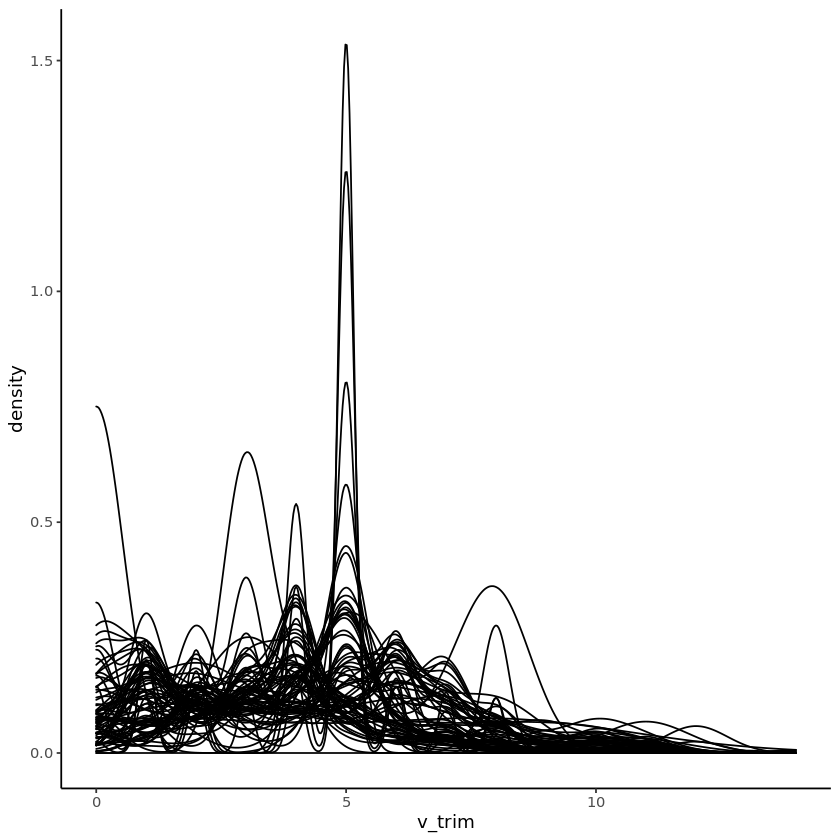

In [14]:
# plot distributions of trimming for each V-gene
tog = rbind(indiv2, indiv1)

tog %>%
    ggplot(aes(x = v_trim, group = v_gene)) +
    geom_density() +
    theme_classic()

In [15]:
# find the V-gene with the largest average number of trims
tog %>%
    group_by(v_gene) %>%
    summarise(mean_v_trim = mean(v_trim)) %>%
    arrange(desc(mean_v_trim)) %>%
    head()

v_gene,mean_v_trim
<chr>,<dbl>
TRBV7-9*07,7.000000
TRBV10-2*01,5.569620
TRBV2*03,5.562390
TRBV2*01,5.436408
TRBV6-1*01,5.218858
TRBV10-3*02,5.198895


### 2. Find the N-insertion base frequencies for each N-insertion junction (combining data from both individuals). Are they similar?

_Hint: you can use the `rbind` function to combine data sets_

In [16]:
# first find insertion frequencies for VD junction
vd <- DNAStringSet(tog$vd_insert_nucs)
vd %>%
  letterFrequency(c("A", "T", "C", "G"), collapse = TRUE, as.prob = TRUE)

A         T         C         G 
0.1980874 0.2042755 0.3384547 0.2591824

In [17]:
# then find insertion frequencies for DJ junction
dj <- DNAStringSet(tog$dj_insert_nucs)
dj %>%
  letterFrequency(c("A", "T", "C", "G"), collapse = TRUE, as.prob = TRUE)

A         T         C         G 
0.2225913 0.2021616 0.2200334 0.3552137

### 3. Find the rearrangement/s (`cdr3` column) which have the largest overlap between the two individuals. Pick one of the largest overlap rearrangements--which nucleotide rearrangment most commonly leads to that CDR3 amino acid sequence for each individual?

_Hint: there are many ways to do this..._

In [18]:
# find the cdr3 counts for each individual
indiv1_count <- indiv1 %>%
                    filter(cdr3 != '') %>%
                    group_by(cdr3) %>%
                    summarise(cdr3_count_indiv1 = n())

indiv2_count <- indiv2 %>%
                    filter(cdr3 != '') %>%
                    group_by(cdr3) %>%
                    summarise(cdr3_count_indiv2 = n())

# merge count dataframes from both individuals
m <- merge(indiv1_count, indiv2_count)
head(m)

,cdr3,cdr3_count_indiv1,cdr3_count_indiv2
,<chr>,<int>,<int>
1,CAIRGQGVTDTQYF,1,1
2,CAISEGGDTEAFF,1,1
3,CASGDTQYF,1,1
4,CASGETQYF,1,1
5,CASGLAGVYEQYF,1,1
6,CASGLGQETQYF,1,1


In [19]:
# get overlaps for each cdr3
overlap <- m %>%
            filter(cdr3_count_indiv1 >= 1) %>%
            filter(cdr3_count_indiv2 >= 1) %>%
            mutate(overlap = pmin(cdr3_count_indiv1, cdr3_count_indiv2)) %>%
            arrange(desc(overlap))
head(overlap)

,cdr3,cdr3_count_indiv1,cdr3_count_indiv2,overlap
,<chr>,<int>,<int>,<int>
1,CASSFQETQYF,4,6,4
2,CASSLGGNTEAFF,4,5,4
3,CASSLQETQYF,4,5,4
4,CASSLAGYEQYF,3,5,3
5,CASSLGGSYEQYF,4,3,3
6,CASSLGGTDTQYF,3,4,3


In [20]:
# get the max overlap count, and filter the overlap dataframe accordingly
max_overlap = max(overlap$overlap)
max = overlap %>%
        filter(overlap == max_overlap)

max

cdr3,cdr3_count_indiv1,cdr3_count_indiv2,overlap
<chr>,<int>,<int>,<int>
CASSFQETQYF,4,6,4
CASSLGGNTEAFF,4,5,4
CASSLQETQYF,4,5,4


In [23]:
# choose one of the max overlap cdr3 amino acid sequences
# this line will get the cdr3 shown in the first row of the `max` dataframe        
test = max[1,]$cdr3
test

[1] "CASSFQETQYF"

In [25]:
# for each individual 1, find the nt rearrangment that most commonly gives rise to the AA sequence
indiv1 %>%
    filter(cdr3 == test) %>%
    group_by(cdr3_nucseq) %>%
    summarise(nuc_count = n()) %>%
    arrange(desc(nuc_count))

cdr3_nucseq,nuc_count
<chr>,<int>
TGTGCCAGCAGCTTCCAAGAGACCCAGTACTTC,3
TGTGCCAGCAGCTTTCAAGAGACCCAGTACTTC,1


In [26]:
# for each individual 2, find the nt rearrangment that most commonly gives rise to the AA sequence
indiv2 %>%
    filter(cdr3 == test) %>%
    group_by(cdr3_nucseq) %>%
    summarise(nuc_count = n()) %>%
    arrange(desc(nuc_count))

cdr3_nucseq,nuc_count
<chr>,<int>
TGCGCCAGCAGCTTCCAAGAGACCCAGTACTTC,3
TGTGCCAGCAGCTTCCAAGAGACCCAGTACTTC,2
TGTGCCAGCAGCTTTCAAGAGACCCAGTACTTC,1
